## 数据构建与模型

### 1. 数据预处理

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

#### 1.1 sku_info

In [2]:
data_sku_info = pd.read_csv('data/sku_info.csv')
# 对item_first_cate_cd,item_second_cate_cd,item_third_cate_cd,brand_code直接进行one-hot编码
data_sku_info = pd.get_dummies(data_sku_info, columns=['item_first_cate_cd', 'item_second_cate_cd', 'item_third_cate_cd', 'brand_code'])
data_sku_info.head()

,sku_id,item_first_cate_cd_1,item_first_cate_cd_2,item_second_cate_cd_1,item_second_cate_cd_2,item_second_cate_cd_3,item_second_cate_cd_4,item_second_cate_cd_5,item_second_cate_cd_6,item_second_cate_cd_7,...,brand_code_117,brand_code_118,brand_code_119,brand_code_120,brand_code_121,brand_code_122,brand_code_123,brand_code_124,brand_code_125,brand_code_126
0,1,True,False,True,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
1,2,True,False,True,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
2,3,True,False,True,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
3,4,True,False,True,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
4,5,True,False,True,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False


#### 1.2 store_weather

In [3]:
data_store_weather = pd.read_csv('data/store_weather.csv')
# date字段转换为date类型
data_store_weather['date'] = pd.to_datetime(data_store_weather['date']).dt.date
# 对weather_type字段进行one-hot编码
data_store_weather = pd.get_dummies(data_store_weather, columns=['weather_type'])
data_store_weather.head()

,store_id,date,min_temperature,max_temperature,weather_type_0,weather_type_1,weather_type_2,weather_type_3,weather_type_4,weather_type_6,...,weather_type_8,weather_type_9,weather_type_10,weather_type_14,weather_type_15,weather_type_17,weather_type_18,weather_type_30,weather_type_53,weather_type_303
0,3,2022-01-30,0.20,0.31,False,False,False,False,False,False,...,False,False,False,True,False,False,False,False,False,False
1,3,2022-04-13,0.36,0.60,False,True,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
2,3,2022-07-17,0.67,0.91,True,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
3,3,2022-08-23,0.64,0.76,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
4,3,2022-12-17,0.05,0.22,False,True,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False


#### 1.3 sku_prom

In [4]:
data_sku_prom = pd.read_csv('data/sku_prom.csv')
# 如果store_id，sku_id，date, channel相等，那保留discount_off最大的一条记录
data_sku_prom = data_sku_prom.sort_values(by=['store_id', 'sku_id', 'date', 'channel', 'discount_off'], ascending=False)
data_sku_prom = data_sku_prom.drop_duplicates(subset=['store_id', 'sku_id', 'date', 'channel'], keep='first').reset_index(drop=True)
# 将data_sku_prom中的date字段转换为date类型
data_sku_prom['date'] = pd.to_datetime(data_sku_prom['date']).dt.date
# 将data_sku_prom中的promotion_id删除
data_sku_prom.drop(['promotion_id'], axis=1, inplace=True)
# 对promotion_type字段进行one-hot编码
data_sku_prom = pd.get_dummies(data_sku_prom, columns=['promotion_type'])
# 将字段curr_day和total_days转化为一列curr_day = curr_day / total_days
data_sku_prom['curr_day'] = data_sku_prom['curr_day'] / data_sku_prom['total_days']
data_sku_prom.drop(['total_days'], axis=1, inplace=True)
# 对threshold字段进行归一化
data_sku_prom['threshold'] = data_sku_prom['threshold'] / data_sku_prom['threshold'].max()
data_sku_prom.head()

,store_id,sku_id,date,curr_day,threshold,discount_off,channel,promotion_type_1,promotion_type_2,promotion_type_3,promotion_type_4,promotion_type_5,promotion_type_6,promotion_type_7
0,12,999,2023-08-24,1.000000,0.072464,0.25,2,False,False,False,True,False,False,False
1,12,999,2023-08-24,1.000000,0.072464,0.25,1,False,False,False,True,False,False,False
2,12,999,2023-08-23,0.857143,0.072464,0.25,2,False,False,False,True,False,False,False
3,12,999,2023-08-23,0.857143,0.072464,0.25,1,False,False,False,True,False,False,False
4,12,999,2023-08-22,0.714286,0.072464,0.25,2,False,False,False,True,False,False,False


#### 1.4 sku_price

In [5]:
data_sku_price = pd.read_csv('data/sku_price_and_status.csv')
# 首先将date字段转换为只包含年月日的格式
data_sku_price['date'] = pd.to_datetime(data_sku_price['date']).dt.date
# 将价格进行归一化处理
data_sku_price['original_price'] = data_sku_price['original_price'] / data_sku_price['original_price'].max()
data_sku_price.head()

,store_id,sku_id,date,salable_status,stock_status,original_price
0,6,1,2022-06-16,1,1,0.228152
1,6,1,2023-04-08,1,1,0.228152
2,6,1,2021-10-07,0,1,0.228152
3,6,1,2021-12-25,0,1,0.228152
4,6,1,2022-12-02,1,1,0.228152


#### 1.5 sku_sales

In [6]:
data_sku_sales = pd.read_csv('data/sku_sales.csv')
data_sku_sales['order_time'] = pd.to_datetime(data_sku_sales['order_time']).dt.date
data_sku_sales.rename(columns={'order_time': 'date'}, inplace=True)
# 按照store_id, sku_id, sku_id, channel分组，计算quantity的和
data_sales = data_sku_sales.groupby(['store_id', 'sku_id', 'channel', 'date'])['quantity'].sum().reset_index()
data_sales

,store_id,sku_id,channel,date,quantity
0,1,1,1,2022-06-17,1.0
1,1,1,1,2022-06-18,4.0
2,1,1,1,2022-06-19,1.0
3,1,1,1,2022-06-24,1.0
4,1,1,1,2022-06-26,1.0
...,...,...,...,...,...
4130680,12,1000,1,2023-08-31,1.0
4130681,12,1000,2,2023-08-27,1.0
4130682,12,1000,2,2023-08-28,1.0
4130683,12,1000,2,2023-08-29,2.0


#### *测试结果

In [8]:
# data_sales中channel=1和channel=2的数据对quantity进行求和
data_sales_nochannel = data_sales.groupby(['store_id', 'sku_id', 'date'])['quantity'].sum().reset_index()
data_sales_nochannel.tail()

,store_id,sku_id,date,quantity
2751318,12,1000,2023-08-26,1.0
2751319,12,1000,2023-08-27,2.0
2751320,12,1000,2023-08-28,1.0
2751321,12,1000,2023-08-29,2.0
2751322,12,1000,2023-08-31,3.0


In [14]:
# 取出data_sales_nochannel中sku_id=1的数据
data_sales_nochannel_sku1 = data_sales_nochannel[data_sales_nochannel['sku_id'] == 1]

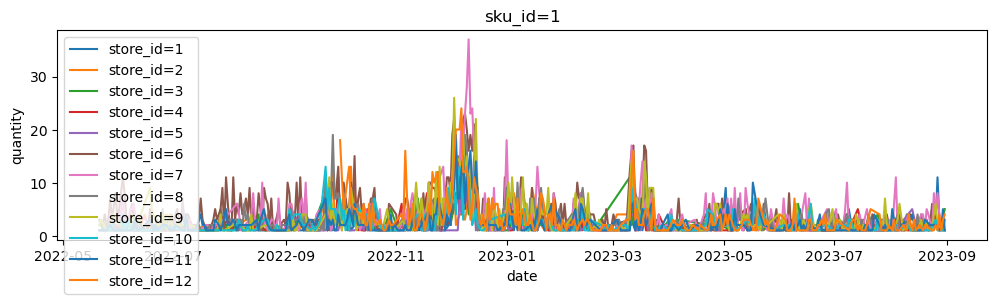

In [16]:
# 画出data_sales_sku1中的销量变化图
plt.figure(figsize=(12, 6))
# store_id=1~12, channel=1/2
plt.subplot(2, 1, 1)
for sid in range(1, 13):
    data_sales_sid_cid = data_sales_nochannel_sku1[data_sales_nochannel_sku1['store_id'] == sid]
    plt.plot(data_sales_sid_cid['date'], data_sales_sid_cid['quantity'], label='store_id=' + str(sid))
plt.legend(loc='upper left')
plt.xlabel('date')
plt.ylabel('quantity')
plt.title('sku_id=1')
plt.show()

In [71]:
# 取出store_id=1， channel=1的数据
data_sales_nochannel_sku1_sid1 = data_sales_nochannel_sku1[data_sales_nochannel_sku1['store_id'] == 1]
# 从2023-09-01之前的数据中往前每隔7天求和，得到num//7个数据
# 从最小的时间到2023-08-31，生成这个时间段的所有日期
date_list = pd.date_range(start=data_sales_nochannel_sku1_sid1['date'].min(), end='2023-08-31', freq='D')
# 将date_list和data_sales_nochannel_sku1_sid1['date']进行合并，得到所有的日期
date_list = pd.DataFrame(date_list, columns=['date'])
date_list['date'] = pd.to_datetime(date_list['date']).dt.date
data_raw = pd.merge(date_list, data_sales_nochannel_sku1_sid1, on=['date'])
data_raw = data_raw.fillna(0)
# 去除store_id, sku_id字段
data_raw.drop(['store_id', 'sku_id'], axis=1, inplace=True)
# 每隔7天求和
num = data_raw.shape[0]
data_raw = data_raw.iloc[num - num // 7 * 7:]
# 每7个日期求和
data_week = data_raw.groupby(data_raw.index // 7)['quantity'].sum()
data_week

0      9.0
1     17.0
2     14.0
3      9.0
4     11.0
5     10.0
6      9.0
7     10.0
8      9.0
9     17.0
10    28.0
11    23.0
12     8.0
13    15.0
14    18.0
15    29.0
16    66.0
17    31.0
18    27.0
19    23.0
20    13.0
21    14.0
22    10.0
23    18.0
24    13.0
25    11.0
26    19.0
27    12.0
28    15.0
29    10.0
30    16.0
31    12.0
32    13.0
33    12.0
34    13.0
35    13.0
36    28.0
37     2.0
Name: quantity, dtype: float64

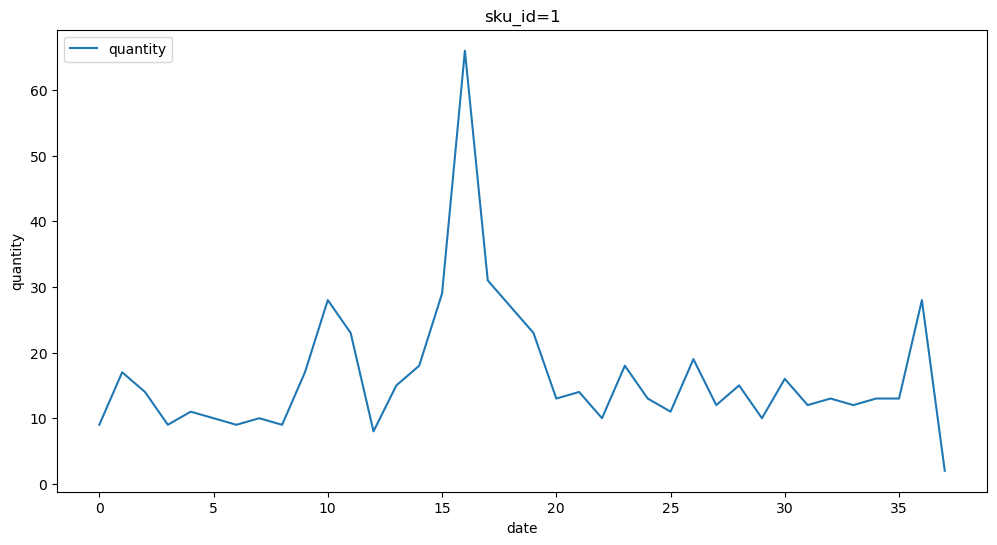

In [70]:
# 画出data_raw的销量变化图
plt.figure(figsize=(12, 6))
plt.plot(data_week.index, data_week.values, label='quantity')
plt.legend(loc='upper left')
plt.xlabel('date')
plt.ylabel('quantity')
plt.title('sku_id=1')
plt.show()

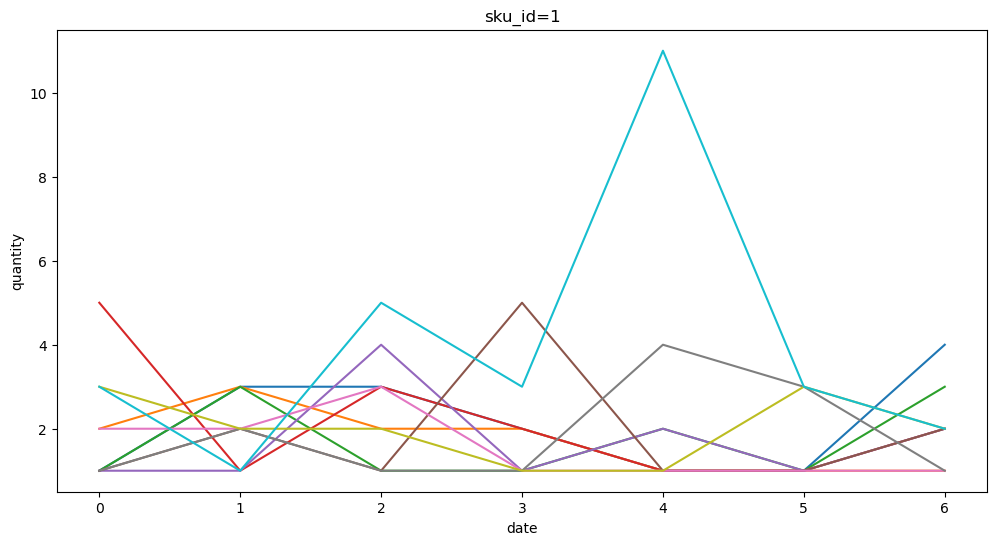

In [81]:
# 画出每一个week中的销量变化图
plt.figure(figsize=(12, 6))
for i in range(data_raw.shape[0] - 7 * 10, data_raw.shape[0], 7):
    plt.plot((data_raw.index[i:i + 7] - 1) % 7, data_raw["quantity"][i:i + 7], label='week=' + str(i // 7))
# plt.legend(loc='upper left')
plt.xlabel('date')
plt.ylabel('quantity')
plt.title('sku_id=1')
plt.show()

In [59]:
data_sales_nochannel_sku1_sid1

,store_id,sku_id,date,quantity
0,1,1,2022-05-23,1.0
1,1,1,2022-05-28,3.0
2,1,1,2022-05-29,2.0
3,1,1,2022-05-30,1.0
4,1,1,2022-05-31,1.0
...,...,...,...,...
255,1,1,2023-08-24,5.0
256,1,1,2023-08-26,3.0
257,1,1,2023-08-27,11.0
258,1,1,2023-08-28,3.0


In [9]:
# 取出日期在2023-08-18到2023-08-31之间的数据
data_prv_sales = data_sales_nochannel[(data_sales_nochannel['date'] >= pd.to_datetime('2023-08-18').date()) & (data_sales_nochannel['date'] <= pd.to_datetime('2023-08-31').date())]
data_prv_sales

,store_id,sku_id,date,quantity
253,1,1,2023-08-19,3.0
254,1,1,2023-08-22,1.0
255,1,1,2023-08-24,5.0
256,1,1,2023-08-26,3.0
257,1,1,2023-08-27,11.0
...,...,...,...,...
2751318,12,1000,2023-08-26,1.0
2751319,12,1000,2023-08-27,2.0
2751320,12,1000,2023-08-28,1.0
2751321,12,1000,2023-08-29,2.0


In [13]:
# 对于store_id和sku_id相同的数据，将其quantity进行求min和max
data_prv_sales = data_prv_sales.groupby(['store_id', 'sku_id'])['quantity'].agg([('quantity_min', 'min'), ('quantity_max', 'max')]).reset_index()
data_prv_sales

,store_id,sku_id,quantity_min,quantity_max
0,1,1,1.0,11.0
1,1,2,1.0,9.0
2,1,3,1.0,11.0
3,1,4,1.0,8.0
4,1,5,2.0,55.0
...,...,...,...,...
11628,12,996,1.0,3.0
11629,12,997,1.0,3.0
11630,12,998,1.0,3.0
11631,12,999,1.0,6.0


In [14]:
# store_id从1-12，sku_id从1-1000，order_time从2023-08-18到2023-08-31
store_ids = list(range(1, 13))
sku_ids = list(range(1, 1001))
dates = pd.date_range('2023-09-01', '2023-09-14').date

# 生成store_id, sku_id, order_time的笛卡尔积
cartesian = pd.MultiIndex.from_product([store_ids, sku_ids, dates], names=['store_id', 'sku_id', 'date'])
data_now_stocks = pd.DataFrame(cartesian.to_frame(), columns=['store_id', 'sku_id', 'date']).reset_index(drop=True)
data_now_stocks

,store_id,sku_id,date
0,1,1,2023-09-01
1,1,1,2023-09-02
2,1,1,2023-09-03
3,1,1,2023-09-04
4,1,1,2023-09-05
...,...,...,...
167995,12,1000,2023-09-10
167996,12,1000,2023-09-11
167997,12,1000,2023-09-12
167998,12,1000,2023-09-13


In [15]:
data_now_stocks['x_k'] = 0.0
data_now_stocks['x_m'] = 0.0
data_now_stocks

,store_id,sku_id,date,x_k,x_m
0,1,1,2023-09-01,0.0,0.0
1,1,1,2023-09-02,0.0,0.0
2,1,1,2023-09-03,0.0,0.0
3,1,1,2023-09-04,0.0,0.0
4,1,1,2023-09-05,0.0,0.0
...,...,...,...,...,...
167995,12,1000,2023-09-10,0.0,0.0
167996,12,1000,2023-09-11,0.0,0.0
167997,12,1000,2023-09-12,0.0,0.0
167998,12,1000,2023-09-13,0.0,0.0


In [17]:
for store_id in store_ids:
    for sku_id in sku_ids:
        for date in dates:
            # 价格因素
            temp = data_sku_price[(data_sku_price['store_id'] == store_id) & (data_sku_price['sku_id'] == sku_id) & (data_sku_price['date'] == date)]
            if temp.shape[0] == 0:
                p = 0
            else:
                p = (1 - temp['original_price'].values[0])
            # 折扣因素
            temp = data_sku_prom[(data_sku_prom['store_id'] == store_id) & (data_sku_prom['sku_id'] == sku_id) & (data_sku_prom['date'] == date)]
            if temp.shape[0] == 0:
                d = 0
            else:
                d = temp['discount_off'].values.max()
            p *= (d / 2 + 1)
            # 日期因素，判断当前date是星期几，如果是周末，那么p = p * 1.1
            if date.weekday() >= 5:
                p *= 1.1
            # 综合给出这一天的quantity
            try:
                tmax = data_prv_sales[(data_prv_sales['store_id'] == store_id) & (data_prv_sales['sku_id'] == sku_id)]['quantity_min'].values[0]
                tmin = data_prv_sales[(data_prv_sales['store_id'] == store_id) & (data_prv_sales['sku_id'] == sku_id)]['quantity_max'].values[0]
                quantity = tmin + (tmax - tmin) * p
            except:
                quantity = 0
            # 将quantity放入data_now_stocks中
            data_now_stocks.loc[(data_now_stocks['store_id'] == store_id) & (data_now_stocks['sku_id'] == sku_id) & (data_now_stocks['date'] == date), 'x_k'] = quantity


KeyboardInterrupt: 

In [20]:
data_stocks = pd.merge(data_now_stocks, data_sku_price, on=['store_id', 'sku_id', 'date'], how='left')
# data_stocks = pd.merge(data_stocks, data_sku_prom, on=['store_id', 'sku_id'], how='left')
data_stocks = pd.merge(data_stocks, data_prv_sales, on=['store_id', 'sku_id'], how='left')
p = (1 - data_stocks['original_price'].values) * ((data_stocks['date'].apply(lambda x: x.weekday()) >= 5) * 0.1 + 1)
# 取ceil
data_stocks['x_k'] = (data_stocks['quantity_min'].values + (data_stocks['quantity_max'].values - data_stocks['quantity_min'].values) * p).apply(np.ceil)
# 只包含store_id, sku_id, date, x_k, x_m
data_stocks = data_stocks[['store_id', 'sku_id', 'date', 'x_k', 'x_m']]
data_stocks

,store_id,sku_id,date,x_k,x_m
0,1,1,2023-09-01,9.0,0.0
1,1,1,2023-09-02,10.0,0.0
2,1,1,2023-09-03,10.0,0.0
3,1,1,2023-09-04,9.0,0.0
4,1,1,2023-09-05,9.0,0.0
...,...,...,...,...,...
167995,12,1000,2023-09-10,3.0,0.0
167996,12,1000,2023-09-11,3.0,0.0
167997,12,1000,2023-09-12,3.0,0.0
167998,12,1000,2023-09-13,3.0,0.0


In [ ]:
# data_now_stocks.fillna(0, inplace=True)
data_now_stocks

In [ ]:
# 价格越高，就将quantity减少一定的比例
p = (1 - data_sku_price['original_price'])
# 折扣越大，就将quantity增加一定的比例
d = data_sku_prom['discount_off']

data_prv_sales['quantity'] = (data_prv_sales['quantity_max'] - data_prv_sales['quantity_min']) * p + data_prv_sales['quantity_min']
# 对于quantity向上取整
data_prv_sales['quantity'] = np.ceil(data_prv_sales['quantity'])
data_prv_sales

In [55]:
data_now_stocks = pd.merge(data_now_stocks, data_prv_sales, on=['store_id', 'sku_id'], how='left')
data_now_stocks.fillna(0, inplace=True)
data_now_stocks

,store_id,sku_id,date,quantity_min,quantity_max,quantity
0,1,1,2023-09-01,1.0,11.0,9.0
1,1,1,2023-09-02,1.0,11.0,9.0
2,1,1,2023-09-03,1.0,11.0,9.0
3,1,1,2023-09-04,1.0,11.0,9.0
4,1,1,2023-09-05,1.0,11.0,9.0
...,...,...,...,...,...,...
167995,12,1000,2023-09-10,1.0,3.0,3.0
167996,12,1000,2023-09-11,1.0,3.0,3.0
167997,12,1000,2023-09-12,1.0,3.0,3.0
167998,12,1000,2023-09-13,1.0,3.0,3.0


In [56]:
# 将quantity字段重命名为x_k, 新增一列x_m全为0
data_now_stocks.rename(columns={'quantity': 'x_k'}, inplace=True)
data_now_stocks['x_m'] = 0
# 删除quantity_min和quantity_max字段
data_now_stocks.drop(['quantity_min', 'quantity_max'], axis=1, inplace=True)
data_now_stocks

,store_id,sku_id,date,x_k,x_m
0,1,1,2023-09-01,9.0,0
1,1,1,2023-09-02,9.0,0
2,1,1,2023-09-03,9.0,0
3,1,1,2023-09-04,9.0,0
4,1,1,2023-09-05,9.0,0
...,...,...,...,...,...
167995,12,1000,2023-09-10,3.0,0
167996,12,1000,2023-09-11,3.0,0
167997,12,1000,2023-09-12,3.0,0
167998,12,1000,2023-09-13,3.0,0


In [22]:
# 导出data_now_stocks，注意x_k和x_m都要保留两位小数
data_stocks.fillna(0, inplace=True)
data_stocks.to_csv('test/test_result.csv', index=False, float_format='%.2f')

#### *对评测期间的数据进行观察

In [7]:
data_sku_price[data_sku_price['date'] >= pd.to_datetime('2023-09-01').date()]

,store_id,sku_id,date,salable_status,stock_status,original_price
55,6,1,2023-09-03,-1,-1,0.200394
67,6,1,2023-09-05,-1,-1,0.200394
119,6,1,2023-09-06,-1,-1,0.200394
239,6,1,2023-09-09,-1,-1,0.200394
247,6,1,2023-09-01,-1,-1,0.200394
...,...,...,...,...,...,...
5104144,4,367,2023-09-04,-1,-1,0.154728
5104146,4,367,2023-09-03,-1,-1,0.154728
5104149,4,367,2023-09-11,-1,-1,0.154728
5104150,4,367,2023-09-09,-1,-1,0.154728


In [8]:
data_sku_prom[data_sku_prom['date'] >= pd.to_datetime('2023-09-01').date()]

,store_id,sku_id,date,curr_day,threshold,discount_off,channel,promotion_type_1,promotion_type_2,promotion_type_3,promotion_type_4,promotion_type_5,promotion_type_6,promotion_type_7
14,12,997,2023-09-07,1.000000,0.072464,0.25,2,False,False,False,True,False,False,False
15,12,997,2023-09-07,1.000000,0.072464,0.25,1,False,False,False,True,False,False,False
16,12,997,2023-09-06,0.857143,0.072464,0.25,2,False,False,False,True,False,False,False
17,12,997,2023-09-06,0.857143,0.072464,0.25,1,False,False,False,True,False,False,False
18,12,997,2023-09-05,0.714286,0.072464,0.25,2,False,False,False,True,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2195674,1,1,2023-09-03,0.714286,0.089130,0.20,1,True,False,False,False,False,False,False
2195675,1,1,2023-09-02,0.642857,0.089130,0.20,2,True,False,False,False,False,False,False
2195676,1,1,2023-09-02,0.642857,0.089130,0.20,1,True,False,False,False,False,False,False
2195677,1,1,2023-09-01,0.571429,0.089130,0.20,2,True,False,False,False,False,False,False


In [9]:
data_store_weather[data_store_weather['date'] >= pd.to_datetime('2023-09-01').date()]

,store_id,date,min_temperature,max_temperature,weather_type_0,weather_type_1,weather_type_2,weather_type_3,weather_type_4,weather_type_6,...,weather_type_8,weather_type_9,weather_type_10,weather_type_14,weather_type_15,weather_type_17,weather_type_18,weather_type_30,weather_type_53,weather_type_303
97,3,2023-09-08,0.65,0.76,False,False,False,False,True,False,...,False,False,False,False,False,False,False,False,False,False
106,3,2023-09-06,0.65,0.84,True,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
180,3,2023-09-03,0.64,0.80,False,True,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
193,3,2023-09-14,0.55,0.78,True,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
233,3,2023-09-11,0.60,0.78,False,True,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7980,12,2023-09-02,0.62,0.76,False,False,False,False,True,False,...,False,False,False,False,False,False,False,False,False,False
8005,12,2023-09-09,0.62,0.67,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
8008,12,2023-09-07,0.67,0.82,False,False,True,False,False,False,...,False,False,False,False,False,False,False,False,False,False
8074,12,2023-09-13,0.55,0.75,True,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False


#### 1.6 合并

In [20]:
# 从2023-08-01到最大的日期，每隔一天生成一个日期
date_range = pd.date_range('2023-08-01', '2023-09-14', freq='D')
# 生成一个包含所有日期的dataframe
date_range = pd.DataFrame({'date': date_range})
# store_id从1到12，sku_id从1到1000，生成一个包含所有store_id, sku_id, date的dataframe，使用笛卡尔积
store_id_list = pd.DataFrame({'store_id': list(range(1, 13))})
sku_id_list = pd.DataFrame({'sku_id': list(range(1, 1001))})
data = pd.merge(pd.merge(store_id_list, sku_id_list, how='cross'), date_range, how='cross')
data['date'] = data['date'].dt.date
# channel从1到2，再进行一次笛卡尔积
channel_list = pd.DataFrame({'channel': [1, 2]})
data = pd.merge(data, channel_list, how='cross')
data

,store_id,sku_id,date,channel
0,1,1,2023-08-01,1
1,1,1,2023-08-01,2
2,1,1,2023-08-02,1
3,1,1,2023-08-02,2
4,1,1,2023-08-03,1
...,...,...,...,...
1079995,12,1000,2023-09-12,2
1079996,12,1000,2023-09-13,1
1079997,12,1000,2023-09-13,2
1079998,12,1000,2023-09-14,1


In [21]:
# 与data_sku_sales进行合并，使用store_id, sku_id, date, channel进行合并
data = pd.merge(data, data_sales, how='left', on=['store_id', 'sku_id', 'date', 'channel'])
# 将quantity字段中的NaN值填充为0
data['quantity'].fillna(0, inplace=True)
data

,store_id,sku_id,date,channel,quantity
0,1,1,2023-08-01,1,0.0
1,1,1,2023-08-01,2,0.0
2,1,1,2023-08-02,1,2.0
3,1,1,2023-08-02,2,0.0
4,1,1,2023-08-03,1,1.0
...,...,...,...,...,...
1079995,12,1000,2023-09-12,2,0.0
1079996,12,1000,2023-09-13,1,0.0
1079997,12,1000,2023-09-13,2,0.0
1079998,12,1000,2023-09-14,1,0.0


In [22]:
# 与sku_price进行合并，使用store_id, sku_id, date进行合并
data = pd.merge(data, data_sku_price, how='left', on=['store_id', 'sku_id', 'date'])
# 将original_price, salable_status, stock_status字段中的NaN值填充为0
data['original_price'].fillna(0, inplace=True)
data['salable_status'].fillna(0, inplace=True)
data['stock_status'].fillna(0, inplace=True)
data

,store_id,sku_id,date,channel,quantity,salable_status,stock_status,original_price
0,1,1,2023-08-01,1,0.0,1.0,1.0,0.200394
1,1,1,2023-08-01,2,0.0,1.0,1.0,0.200394
2,1,1,2023-08-02,1,2.0,1.0,1.0,0.200394
3,1,1,2023-08-02,2,0.0,1.0,1.0,0.200394
4,1,1,2023-08-03,1,1.0,1.0,1.0,0.200394
...,...,...,...,...,...,...,...,...
1079995,12,1000,2023-09-12,2,0.0,-1.0,-1.0,0.245165
1079996,12,1000,2023-09-13,1,0.0,-1.0,-1.0,0.245165
1079997,12,1000,2023-09-13,2,0.0,-1.0,-1.0,0.245165
1079998,12,1000,2023-09-14,1,0.0,-1.0,-1.0,0.245165


In [23]:
# 与sku_prom进行合并，使用store_id, sku_id, date进行合并
data = pd.merge(data, data_sku_prom, how='left', on=['store_id', 'sku_id', 'date', 'channel'])
# 将nan值填充为0
data.fillna(0, inplace=True)
data

,store_id,sku_id,date,channel,quantity,salable_status,stock_status,original_price,curr_day,threshold,discount_off,promotion_type_1,promotion_type_2,promotion_type_3,promotion_type_4,promotion_type_5,promotion_type_6,promotion_type_7
0,1,1,2023-08-01,1,0.0,1.0,1.0,0.200394,0.0,0.0,0.0,0,0,0,0,0,0,0
1,1,1,2023-08-01,2,0.0,1.0,1.0,0.200394,0.0,0.0,0.0,0,0,0,0,0,0,0
2,1,1,2023-08-02,1,2.0,1.0,1.0,0.200394,0.0,0.0,0.0,0,0,0,0,0,0,0
3,1,1,2023-08-02,2,0.0,1.0,1.0,0.200394,0.0,0.0,0.0,0,0,0,0,0,0,0
4,1,1,2023-08-03,1,1.0,1.0,1.0,0.200394,0.0,0.0,0.0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1079995,12,1000,2023-09-12,2,0.0,-1.0,-1.0,0.245165,0.0,0.0,0.0,0,0,0,0,0,0,0
1079996,12,1000,2023-09-13,1,0.0,-1.0,-1.0,0.245165,0.0,0.0,0.0,0,0,0,0,0,0,0
1079997,12,1000,2023-09-13,2,0.0,-1.0,-1.0,0.245165,0.0,0.0,0.0,0,0,0,0,0,0,0
1079998,12,1000,2023-09-14,1,0.0,-1.0,-1.0,0.245165,0.0,0.0,0.0,0,0,0,0,0,0,0


In [24]:
# 与store_weather进行合并，使用store_id, date进行合并
data = pd.merge(data, data_store_weather, how='left', on=['store_id', 'date'])
# 将nan值填充为0
data.fillna(0, inplace=True)
data

,store_id,sku_id,date,channel,quantity,salable_status,stock_status,original_price,curr_day,threshold,...,weather_type_8,weather_type_9,weather_type_10,weather_type_14,weather_type_15,weather_type_17,weather_type_18,weather_type_30,weather_type_53,weather_type_303
0,1,1,2023-08-01,1,0.0,1.0,1.0,0.200394,0.0,0.0,...,False,False,False,False,False,False,False,False,False,False
1,1,1,2023-08-01,2,0.0,1.0,1.0,0.200394,0.0,0.0,...,False,False,False,False,False,False,False,False,False,False
2,1,1,2023-08-02,1,2.0,1.0,1.0,0.200394,0.0,0.0,...,False,False,False,False,False,False,False,False,False,False
3,1,1,2023-08-02,2,0.0,1.0,1.0,0.200394,0.0,0.0,...,False,False,False,False,False,False,False,False,False,False
4,1,1,2023-08-03,1,1.0,1.0,1.0,0.200394,0.0,0.0,...,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1079995,12,1000,2023-09-12,2,0.0,-1.0,-1.0,0.245165,0.0,0.0,...,False,False,False,False,False,False,False,False,False,False
1079996,12,1000,2023-09-13,1,0.0,-1.0,-1.0,0.245165,0.0,0.0,...,False,False,False,False,False,False,False,False,False,False
1079997,12,1000,2023-09-13,2,0.0,-1.0,-1.0,0.245165,0.0,0.0,...,False,False,False,False,False,False,False,False,False,False
1079998,12,1000,2023-09-14,1,0.0,-1.0,-1.0,0.245165,0.0,0.0,...,False,False,False,False,False,False,False,False,False,False


In [25]:
# 与sku_info进行合并，使用sku_id进行合并
data = pd.merge(data, data_sku_info, how='left', on=['sku_id'])
# 将nan值填充为0
data.fillna(0, inplace=True)
data

,store_id,sku_id,date,channel,quantity,salable_status,stock_status,original_price,curr_day,threshold,...,brand_code_117,brand_code_118,brand_code_119,brand_code_120,brand_code_121,brand_code_122,brand_code_123,brand_code_124,brand_code_125,brand_code_126
0,1,1,2023-08-01,1,0.0,1.0,1.0,0.200394,0.0,0.0,...,False,False,False,False,False,False,False,False,False,False
1,1,1,2023-08-01,2,0.0,1.0,1.0,0.200394,0.0,0.0,...,False,False,False,False,False,False,False,False,False,False
2,1,1,2023-08-02,1,2.0,1.0,1.0,0.200394,0.0,0.0,...,False,False,False,False,False,False,False,False,False,False
3,1,1,2023-08-02,2,0.0,1.0,1.0,0.200394,0.0,0.0,...,False,False,False,False,False,False,False,False,False,False
4,1,1,2023-08-03,1,1.0,1.0,1.0,0.200394,0.0,0.0,...,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1079995,12,1000,2023-09-12,2,0.0,-1.0,-1.0,0.245165,0.0,0.0,...,False,False,False,False,False,False,False,False,False,False
1079996,12,1000,2023-09-13,1,0.0,-1.0,-1.0,0.245165,0.0,0.0,...,False,False,False,False,False,False,False,False,False,False
1079997,12,1000,2023-09-13,2,0.0,-1.0,-1.0,0.245165,0.0,0.0,...,False,False,False,False,False,False,False,False,False,False
1079998,12,1000,2023-09-14,1,0.0,-1.0,-1.0,0.245165,0.0,0.0,...,False,False,False,False,False,False,False,False,False,False


In [38]:
# 将data的promotion_type_1到promotion_type_7字段都置为bool
for i in range(1, 8):
    data['promotion_type_' + str(i)] = data['promotion_type_' + str(i)].astype(bool)

In [48]:
# 将data不同channel的均值起来
data_simple = data.groupby(['store_id', 'sku_id', 'date']).mean().reset_index()

In [50]:
data_simple['quantity'] = data_simple['quantity'] * 2
data_simple

,store_id,sku_id,date,channel,quantity,salable_status,stock_status,original_price,curr_day,threshold,...,brand_code_117,brand_code_118,brand_code_119,brand_code_120,brand_code_121,brand_code_122,brand_code_123,brand_code_124,brand_code_125,brand_code_126
0,1,1,2023-08-01,1.5,0.0,1.0,1.0,0.200394,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,1,1,2023-08-02,1.5,2.0,1.0,1.0,0.200394,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,1,1,2023-08-03,1.5,1.0,1.0,1.0,0.200394,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,1,1,2023-08-04,1.5,1.0,1.0,1.0,0.200394,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,1,1,2023-08-05,1.5,4.0,1.0,1.0,0.200394,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
539995,12,1000,2023-09-10,1.5,0.0,-1.0,-1.0,0.245165,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
539996,12,1000,2023-09-11,1.5,0.0,-1.0,-1.0,0.245165,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
539997,12,1000,2023-09-12,1.5,0.0,-1.0,-1.0,0.245165,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
539998,12,1000,2023-09-13,1.5,0.0,-1.0,-1.0,0.245165,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


### 2. 构建和划分数据集

In [54]:
# 对每个商店的每个商品都进行预测
data_grouped = []
for store_id in range(1, 13):
    for sku_id in range(1, 1001):
        data_i = data_simple[(data_simple['store_id'] == store_id) & (data_simple['sku_id'] == sku_id)]
        data_grouped.append((store_id, sku_id, data_i))

In [112]:
data_i = data_grouped[0][2]
train_data = data[data['date'] < pd.to_datetime('2023-08-25').date()]
test_data = data_i[(data_i['date'] >= pd.to_datetime('2023-08-25').date()) & (data_i['date'] < pd.to_datetime('2023-09-01').date())]
train_X = train_data.drop(['store_id', 'sku_id', 'date', 'quantity', 'salable_status', 'stock_status'], axis=1)
MAX_QUANTITY = train_data['quantity'].max()
train_y = train_data['quantity'] / MAX_QUANTITY
test_X = test_data.drop(['store_id', 'sku_id', 'date', 'quantity', 'salable_status', 'stock_status'], axis=1)
test_y = test_data['quantity'] / MAX_QUANTITY

In [105]:
print("shape of train_X: ", train_X.shape)
print("shape of train_y: ", train_y.shape)
print("shape of test_X: ", test_X.shape)
print("shape of test_y: ", test_y.shape)

shape of train_X:  (576000, 210)
shape of train_y:  (576000,)
shape of test_X:  (7, 210)
shape of test_y:  (7,)


In [126]:
# 使用Pytorch构建LSTM模型
import torch
import torch.nn as nn
import torch.optim as optim

# 将数据转换为tensor
train_X = torch.tensor(train_X.values.astype(np.float32), dtype=torch.float32)
train_y = torch.tensor(train_y.values.astype(np.float32), dtype=torch.float32)
test_X = torch.tensor(test_X.values.astype(np.float32), dtype=torch.float32)
test_y = torch.tensor(test_y.values.astype(np.float32), dtype=torch.float32)


In [107]:
# train_X shape为[31, 212]，其中31为数据大小，212为特征数
# 使用sklearn构建一个简单的线性回归模型Linear Regression
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

lr = LinearRegression()
lr.fit(train_X, train_y)
pred_y = lr.predict(test_X)
print("Linear Regression MSE: ", mean_squared_error(test_y, pred_y))


Linear Regression MSE:  4.1702155e-05


In [116]:
# 使用sklern构建一个简单的决策树模型Decision Tree
from sklearn.tree import DecisionTreeRegressor

dtr = DecisionTreeRegressor()
dtr.fit(train_X, train_y)
pred_y = dtr.predict(test_X)
print("Decision Tree MSE: ", mean_squared_error(test_y, pred_y))


c:\Users\Yipeng\anaconda3\envs\pytorch\lib\site-packages\sklearn\utils\validation.py:767: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if not hasattr(array, "sparse") and array.dtypes.apply(is_sparse).any():
c:\Users\Yipeng\anaconda3\envs\pytorch\lib\site-packages\sklearn\utils\validation.py:605: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype):
c:\Users\Yipeng\anaconda3\envs\pytorch\lib\site-packages\sklearn\utils\validation.py:614: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype) or not is_extension_array_dtype(pd_dtype):
c:\Users\Yipeng\anaconda3\envs\pytorch\lib\site-packages\sklearn\utils\validation.py:605: FutureWarning: is_sparse is deprecated and will be removed in a future version

Decision Tree MSE:  4.952564008406262e-05


c:\Users\Yipeng\anaconda3\envs\pytorch\lib\site-packages\sklearn\utils\validation.py:767: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if not hasattr(array, "sparse") and array.dtypes.apply(is_sparse).any():
c:\Users\Yipeng\anaconda3\envs\pytorch\lib\site-packages\sklearn\utils\validation.py:605: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype):
c:\Users\Yipeng\anaconda3\envs\pytorch\lib\site-packages\sklearn\utils\validation.py:614: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype) or not is_extension_array_dtype(pd_dtype):
c:\Users\Yipeng\anaconda3\envs\pytorch\lib\site-packages\sklearn\utils\validation.py:605: FutureWarning: is_sparse is deprecated and will be removed in a future version

In [121]:
# 使用sklearn构建一个支持向量机模型Support Vector Machine
from sklearn.svm import SVR

svr = SVR()
svr.fit(train_X, train_y)
pred_y = svr.predict(test_X)
print("Support Vector Machine MSE: ", mean_squared_error(test_y, pred_y))


c:\Users\Yipeng\anaconda3\envs\pytorch\lib\site-packages\sklearn\utils\validation.py:767: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if not hasattr(array, "sparse") and array.dtypes.apply(is_sparse).any():
c:\Users\Yipeng\anaconda3\envs\pytorch\lib\site-packages\sklearn\utils\validation.py:605: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype):
c:\Users\Yipeng\anaconda3\envs\pytorch\lib\site-packages\sklearn\utils\validation.py:614: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype) or not is_extension_array_dtype(pd_dtype):
c:\Users\Yipeng\anaconda3\envs\pytorch\lib\site-packages\sklearn\utils\validation.py:605: FutureWarning: is_sparse is deprecated and will be removed in a future version

Support Vector Machine MSE:  0.0002910155843943861


c:\Users\Yipeng\anaconda3\envs\pytorch\lib\site-packages\sklearn\utils\validation.py:767: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if not hasattr(array, "sparse") and array.dtypes.apply(is_sparse).any():
c:\Users\Yipeng\anaconda3\envs\pytorch\lib\site-packages\sklearn\utils\validation.py:605: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype):
c:\Users\Yipeng\anaconda3\envs\pytorch\lib\site-packages\sklearn\utils\validation.py:614: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype) or not is_extension_array_dtype(pd_dtype):
c:\Users\Yipeng\anaconda3\envs\pytorch\lib\site-packages\sklearn\utils\validation.py:605: FutureWarning: is_sparse is deprecated and will be removed in a future version

In [132]:
# 使用pytorch构建一个简单的神经网络模型Neural Network
class NeuralNetwork(nn.Module):
    def __init__(self):
        super(NeuralNetwork, self).__init__()
        self.fc1 = nn.Linear(210, 128)
        self.fc2 = nn.Linear(128, 64)
        self.fc3 = nn.Linear(64, 1)
        self.relu = nn.ReLU()
        self.sigmoid = nn.Sigmoid()

    def forward(self, x):
        x = self.relu(self.fc1(x))
        x = self.relu(self.fc2(x))
        x = self.sigmoid(self.fc3(x))
        return x

# 定义一个训练函数
def train(model, train_X, train_y, test_X, test_y, epochs=2, lr=0.001, batch_size=64):
    optimizer = optim.Adam(model.parameters(), lr=lr)
    criterion = nn.MSELoss()
    for epoch in range(epochs):
        for i in range(0, train_X.shape[0], batch_size):
            batch_X = train_X[i:i+batch_size]
            batch_y = train_y[i:i+batch_size]
            optimizer.zero_grad()
            pred_y = model(batch_X)
            loss = criterion(pred_y, batch_y)
            loss.backward()
            optimizer.step()
            print("epoch: ", epoch, " loss: ", loss.item())
    pred_y = model(test_X)
    print("MSE: ", mean_squared_error(test_y.detach().numpy(), pred_y.detach().numpy()))

# 定义一个测试函数
def test(model, test_X):
    pred_y = model(test_X)
    return pred_y.detach().numpy()

# 定义一个预测函数
def predict(model, test_X):
    pred_y = model(test_X)
    return pred_y.detach().numpy()

# 实例化
model = NeuralNetwork()
# 训练
train(model, train_X, train_y, test_X, test_y)
# 测试
pred_y = test(model, test_X)
print("Neural Network MSE: ", mean_squared_error(test_y.detach().numpy(), pred_y))

epoch:  0  loss:  0.25619766116142273
epoch:  0  loss:  0.2492302507162094
epoch:  0  loss:  0.24358564615249634
epoch:  0  loss:  0.2352227121591568
epoch:  0  loss:  0.22565269470214844
epoch:  0  loss:  0.2322508841753006
epoch:  0  loss:  0.2222720980644226
epoch:  0  loss:  0.20055168867111206
epoch:  0  loss:  0.2110414206981659
epoch:  0  loss:  0.18720977008342743
epoch:  0  loss:  0.16786153614521027
epoch:  0  loss:  0.20714174211025238
epoch:  0  loss:  0.19799427688121796
epoch:  0  loss:  0.19597375392913818
epoch:  0  loss:  0.1881556361913681
epoch:  0  loss:  0.18365800380706787
epoch:  0  loss:  0.18229380249977112
epoch:  0  loss:  0.17429417371749878
epoch:  0  loss:  0.1611708700656891
epoch:  0  loss:  0.15399469435214996
epoch:  0  loss:  0.14749155938625336
epoch:  0  loss:  0.14320720732212067
epoch:  0  loss:  0.13792245090007782
epoch:  0  loss:  0.13397623598575592
epoch:  0  loss:  0.12439535558223724
epoch:  0  loss:  0.12125689536333084
epoch:  0  loss:  0

In [133]:
print(test_y * MAX_QUANTITY)

tensor([ 0.0000,  3.0000, 11.0000,  3.0000,  0.0000,  2.0000,  0.0000])


In [134]:
print(pred_y * MAX_QUANTITY)

[[1.0073584]
 [1.0327749]
 [1.0802201]
 [1.0567441]
 [1.081642 ]
 [1.0198445]
 [1.0788903]]


In [115]:
# 查看参数来确定哪个参数对预测结果影响最大
for x, y in sorted(zip(train_X.columns, lr.coef_), key=lambda x: x[1], reverse=True):
    print(x, y)

item_first_cate_cd_1 113.54066
item_second_cate_cd_4 96.636055
item_third_cate_cd_41 26.360727
item_third_cate_cd_21 26.360064
item_third_cate_cd_20 26.357325
item_third_cate_cd_19 26.35495
item_third_cate_cd_36 26.354475
item_third_cate_cd_44 26.353428
item_second_cate_cd_3 24.920303
item_third_cate_cd_8 20.869026
item_third_cate_cd_6 20.862204
item_third_cate_cd_29 20.861357
item_third_cate_cd_11 20.860798
item_third_cate_cd_35 20.857275
item_third_cate_cd_7 20.856104
item_third_cate_cd_9 20.855778
item_third_cate_cd_32 20.852657
item_third_cate_cd_37 20.836712
item_third_cate_cd_40 20.835728
item_third_cate_cd_38 20.835537
item_third_cate_cd_42 20.832916
item_second_cate_cd_6 19.418797
weather_type_53 18.354044
item_first_cate_cd_2 16.707438
weather_type_14 16.41451
item_third_cate_cd_23 13.699547
item_third_cate_cd_2 13.696836
item_third_cate_cd_1 13.693392
item_third_cate_cd_15 13.6917305
weather_type_15 9.208834
weather_type_6 4.278403
promotion_type_6 0.017606393
discount_off 0.

In [109]:
pred_y * MAX_QUANTITY
    

array([1.2588806, 1.2948486, 1.5016648, 1.5241448, 1.5601127, 1.3083366,
       1.2543846], dtype=float32)

In [108]:
test_y * MAX_QUANTITY

tensor([ 0.0000,  3.0000, 11.0000,  3.0000,  0.0000,  2.0000,  0.0000])

In [84]:
train_y

tensor([0., 2., 1., 1., 4., 3., 0., 1., 3., 2., 0., 0., 2., 1., 1., 3., 2., 0.,
        3., 0., 0., 1., 0., 5.])